In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\sivap\OneDrive\Documents\Projects\Malignant\Malignant Comments Classifier Project\train.csv")

In [3]:
df.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
df.shape

(159571, 8)

In [5]:
df_test = pd.read_csv(r"C:\Users\sivap\OneDrive\Documents\Projects\Malignant\Malignant Comments Classifier Project\test.csv")

In [6]:
df_test

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


- A lot of data cleaning will be required. Id column seems to be unecessary and may require to be dropped

In [7]:
df_test.shape

(153164, 2)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


- No null values can be observed in both the dataset. In testing dataset the labels malignant, highly_malignant,rude,threat,abuse and loath are not present as we have to predict using our model.

In [10]:
df.drop('id',axis=1,inplace=True)

In [11]:
df_test.drop('id',axis=1,inplace=True)

In [12]:
i = ['malignant','highly_malignant','rude','threat','abuse','loathe']
for x in i:
    print(df[x].value_counts())

0    144277
1     15294
Name: malignant, dtype: int64
0    157976
1      1595
Name: highly_malignant, dtype: int64
0    151122
1      8449
Name: rude, dtype: int64
0    159093
1       478
Name: threat, dtype: int64
0    151694
1      7877
Name: abuse, dtype: int64
0    158166
1      1405
Name: loathe, dtype: int64


- We can observe that for each of the labels safe texts are higher number than the non-safe data. Clearly the dataset is imbalanced.

In [13]:
df['comment_text'][7]

"Your vandalism to the Matt Shirvington article has been reverted.  Please don't do it again, or you will be banned."

- we have to remove punctuations, symbols etc from the text. So let's proceed to data cleaning.

#### Checking for duplicates

In [14]:
df.duplicated().sum()

0

In [15]:
df_test.duplicated().sum()

0

There are no duplicates in our data

#### Checking for null values

In [16]:
df.isnull().sum()

comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [17]:
df_test.isnull().sum()

comment_text    0
dtype: int64

There are no null values in our data

In [18]:
x= df.iloc[:,1:].sum()
malig =pd.DataFrame(x,columns =['Number of toxic comments'])

In [19]:
malig

,Number of toxic comments
malignant,15294
highly_malignant,1595
rude,8449
threat,478
abuse,7877
loathe,1405


<AxesSubplot:>

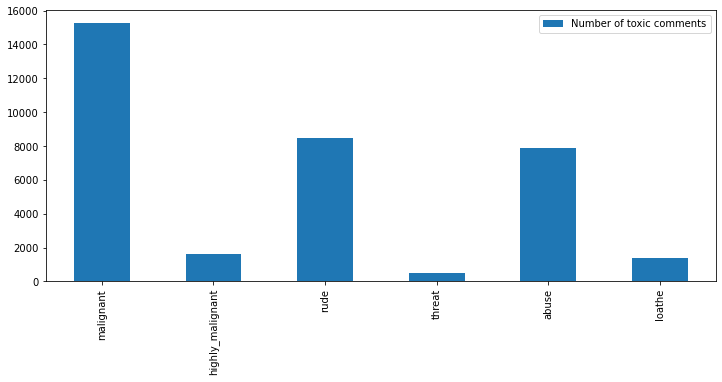

In [20]:
malig.plot(kind ='bar', figsize=(12,5))

- In case of offensive comments, malignant are obseved in higher count and least is found to be threat.

In [21]:
Percentage= []
for i in malig['Number of toxic comments']:
    percentage = (i/159571)*100 
    Percentage.append ("%.2f"% percentage + "%")

In [22]:
malig['Percentage'] =Percentage 

In [23]:
malig

,Number of toxic comments,Percentage
malignant,15294,9.58%
highly_malignant,1595,1.00%
rude,8449,5.29%
threat,478,0.30%
abuse,7877,4.94%
loathe,1405,0.88%


- The same data is converted to percentage to see the exact distribution.
- After data preprocessing, I would like to see how each type of toxic comment differ from each other

In [24]:
c= ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']

In [25]:
# Creating a new column "Sum" to see if the labels are overlapping
df['Sum' ] = df[c].sum(axis =1)
df

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,Sum
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,0
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,0
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,0
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0,0


In [26]:
df['Sum'].value_counts()

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: Sum, dtype: int64

- Non toxic comments have the sum 0
- There are 6360 comments which do not overlap with any any other label and is specific to one.
- Rest 9865 comments ovelap with different labels. 
- Hence, we can catergorize all the labels into during model building and use the classifier to predict if a comment is malignant or not.

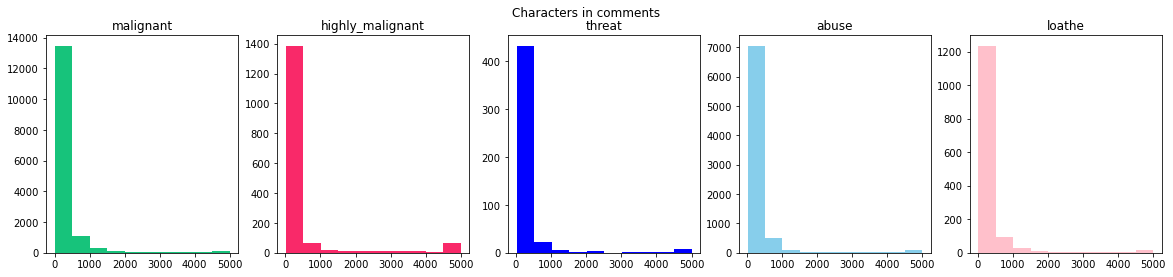

In [27]:
fig,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5,figsize=(20,4))

comment_len = df[df['malignant'] == 1]['comment_text'].str.len()
ax1.hist(comment_len, color="#17C37B")
ax1.set_title('malignant')

comment_len = df[df['highly_malignant'] == 1]['comment_text'].str.len()
ax2.hist(comment_len, color="#F92969")
ax2.set_title('highly_malignant')

comment_len = df[df['threat'] == 1]['comment_text'].str.len()
ax3.hist(comment_len, color="blue")
ax3.set_title('threat')

comment_len = df[df['abuse'] == 1]['comment_text'].str.len()
ax4.hist(comment_len, color="skyblue")
ax4.set_title('abuse')

comment_len = df[df['loathe'] == 1]['comment_text'].str.len()
ax5.hist(comment_len, color="pink")
ax5.set_title('loathe')

fig. suptitle('Characters in comments')
plt.show()

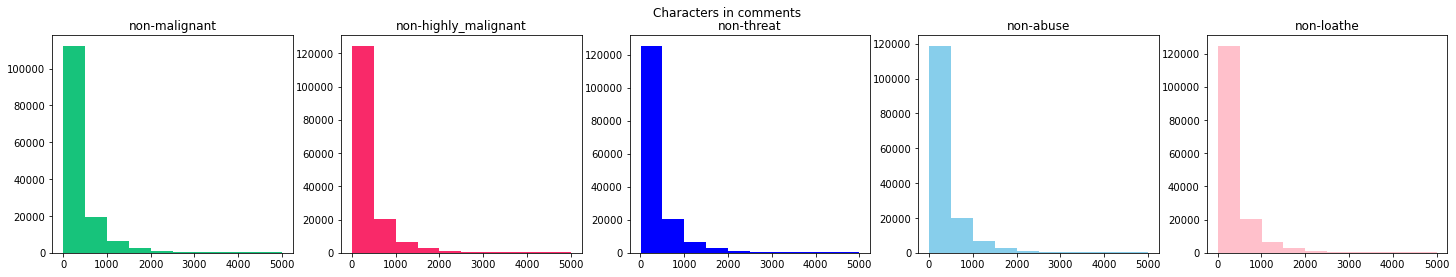

In [28]:
fig,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5,figsize=(25,4))

comment_len = df[df['malignant'] == 0]['comment_text'].str.len()
ax1.hist(comment_len, color="#17C37B")
ax1.set_title('non-malignant')

comment_len = df[df['highly_malignant'] == 0]['comment_text'].str.len()
ax2.hist(comment_len, color="#F92969")
ax2.set_title('non-highly_malignant')

comment_len = df[df['threat'] == 0]['comment_text'].str.len()
ax3.hist(comment_len, color="blue")
ax3.set_title('non-threat')

comment_len = df[df['abuse'] == 0]['comment_text'].str.len()
ax4.hist(comment_len, color="skyblue")
ax4.set_title('non-abuse')

comment_len = df[df['loathe'] == 0]['comment_text'].str.len()
ax5.hist(comment_len, color="pink")
ax5.set_title('non-loathe')

fig. suptitle('Characters in comments')
plt.show()

## Number of words in comment_text

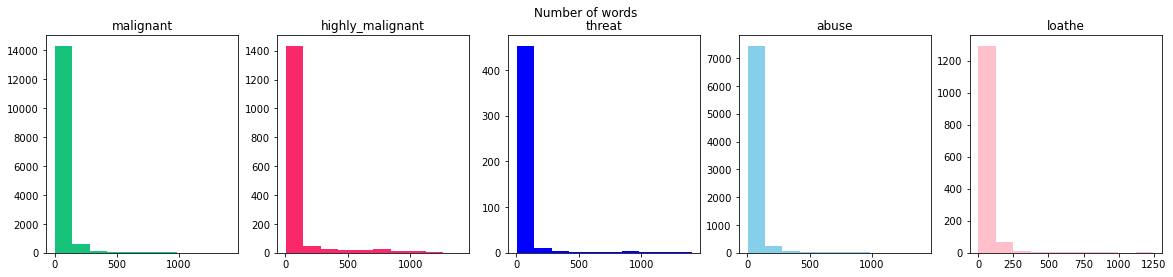

In [29]:
fig,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5,figsize=(20,4))

comment_len = df[df['malignant'] == 1]['comment_text'].str.split().map(lambda x: len(x))
ax1.hist(comment_len, color="#17C37B")
ax1.set_title('malignant')

comment_len = df[df['highly_malignant'] == 1]['comment_text'].str.split().map(lambda x: len(x))
ax2.hist(comment_len, color="#F92969")
ax2.set_title('highly_malignant')

comment_len = df[df['threat'] == 1]['comment_text'].str.split().map(lambda x: len(x))
ax3.hist(comment_len, color="blue")
ax3.set_title('threat')

comment_len = df[df['abuse'] == 1]['comment_text'].str.split().map(lambda x: len(x))
ax4.hist(comment_len, color="skyblue")
ax4.set_title('abuse')

comment_len = df[df['loathe'] == 1]['comment_text'].str.split().map(lambda x: len(x))
ax5.hist(comment_len, color="pink")
ax5.set_title('loathe')

fig. suptitle('Number of words')
plt.show()

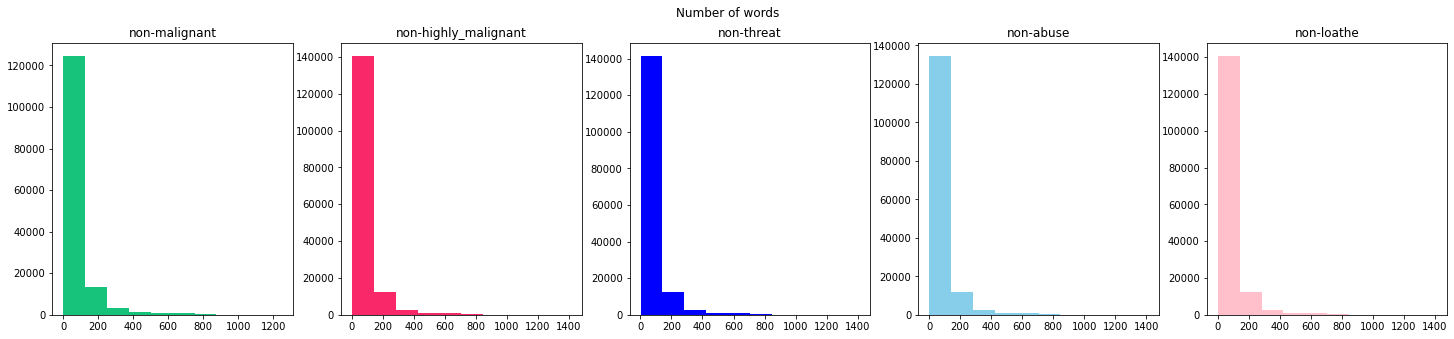

In [30]:
fig,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5,figsize=(25,5))

comment_len = df[df['malignant'] == 0]['comment_text'].str.split().map(lambda x: len(x))
ax1.hist(comment_len, color="#17C37B")
ax1.set_title('non-malignant')

comment_len = df[df['highly_malignant'] == 0]['comment_text'].str.split().map(lambda x: len(x))
ax2.hist(comment_len, color="#F92969")
ax2.set_title('non-highly_malignant')

comment_len = df[df['threat'] == 0]['comment_text'].str.split().map(lambda x: len(x))
ax3.hist(comment_len, color="blue")
ax3.set_title('non-threat')

comment_len = df[df['abuse'] == 0]['comment_text'].str.split().map(lambda x: len(x))
ax4.hist(comment_len, color="skyblue")
ax4.set_title('non-abuse')

comment_len = df[df['loathe'] == 0]['comment_text'].str.split().map(lambda x: len(x))
ax5.hist(comment_len, color="pink")
ax5.set_title('non-loathe')

fig. suptitle('Number of words')
plt.show()

## Data Preprocessing

In [31]:
import re
def decontracted(phrase):
    phrase = re.sub(r"’","'",str(phrase))
    phrase = re.sub(r"”",'"',str(phrase))
    phrase = re.sub(r"“",'"',str(phrase))
    phrase = re.sub(r"won't","will not",str(phrase))
    phrase = re.sub(r"can\'t","can not",str(phrase))
    phrase = re.sub(r"n\'t"," not",str(phrase))
    phrase = re.sub(r"\'re"," are",str(phrase))
    phrase = re.sub(r"don't","do not",str(phrase))
    phrase = re.sub(r"\'s","s",str(phrase))
    phrase = re.sub(r"\'ll"," will",str(phrase))
    phrase = re.sub(r"\'d"," would",str(phrase))
    phrase = re.sub(r"\'t"," not",str(phrase))
    phrase = re.sub(r"\'ve"," have",str(phrase))
    phrase = re.sub(r"\'m"," am",str(phrase))
    return str(phrase)


In [32]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [33]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sivap\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sivap\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [35]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sivap\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [36]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\sivap\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [37]:
stop_words = set(stopwords.words('english') +['wikipedia','wiki', 'hi', 'article', 'think', 'dont', 'make','even','say','well','know','going'])

In [38]:
l = WordNetLemmatizer()

In [39]:
texts = []
for sentence in df['comment_text'].values:
    sent = decontracted(sentence)
    sent = re.sub(r'https?:\/\/.*[\r\n]*','',sent)
    sent = re.sub('[^A-Za-z]', ' ',sent)
    sent = sent.split()
    
    sent = [l.lemmatize(word) for word in sent if word.lower() not in stop_words]
    sent =' '.join(sent)
    texts.append(sent.lower().strip())

In [40]:
texts

['explanation edits made username hardcore metallica fan reverted vandalism closure gas voted new york dolls fac please remove template talk page since retired',
 'aww match background colour seemingly stuck thanks talk january utc',
 'hey man really trying edit war guy constantly removing relevant information talking edits instead talk page seems care formatting actual info',
 'real suggestion improvement wondered section statistic later subsection type accident reference may need tidying exact format ie date format etc later one else first preference formatting style reference want please let appears backlog article review guess may delay reviewer turn listed relevant form eg good nomination transport',
 'sir hero chance remember page thats',
 'congratulations use tool talk',
 'cocksucker piss around work',
 'vandalism matt shirvington reverted please banned',
 'sorry word nonsense offensive anyway intending write anything wow would jump vandalism merely requesting encyclopedic one u

In [41]:
df['comment_text'] = texts
df

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,Sum
0,explanation edits made username hardcore metal...,0,0,0,0,0,0,0
1,aww match background colour seemingly stuck th...,0,0,0,0,0,0,0
2,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,0
3,real suggestion improvement wondered section s...,0,0,0,0,0,0,0
4,sir hero chance remember page thats,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,second time asking view completely contradicts...,0,0,0,0,0,0,0
159567,ashamed horrible thing put talk page,0,0,0,0,0,0,0
159568,spitzer umm there actual prostitution ring cru...,0,0,0,0,0,0,0
159569,look like actually put speedy first version de...,0,0,0,0,0,0,0


# Converting text to numerical data

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer as tf_idf
tfidf = tf_idf(norm = None,stop_words ='english',max_features=500) 
data_cv = tfidf.fit_transform(df.comment_text)
data = pd.DataFrame(data_cv.toarray(), columns =tfidf.get_feature_names_out())
data


,able,according,account,act,action,actual,actually,add,added,adding,...,working,world,wp,write,writing,written,wrong,wrote,year,yes
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,5.675062,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159566,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
159567,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
159568,0.0,0.0,0.0,0.0,0.0,5.675062,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
159569,0.0,0.0,0.0,0.0,0.0,0.000000,4.405355,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
data.shape

(159571, 500)

## EDA

In [43]:
from wordcloud import WordCloud
wc = WordCloud(background_color = 'white',collocations=False, colormap = 'Dark2', max_font_size = 150, random_state =42)

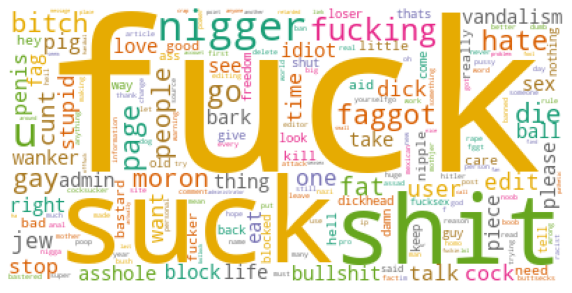

In [44]:
import matplotlib.pyplot as plt

malignants = df["comment_text"][df['malignant']==1]
 
mal_cloud = wc.generate(' '.join(df["comment_text"][df['malignant']==1]))
    
plt.figure(figsize =(10,6))
plt.imshow(mal_cloud)
plt.axis('off')
plt.show()

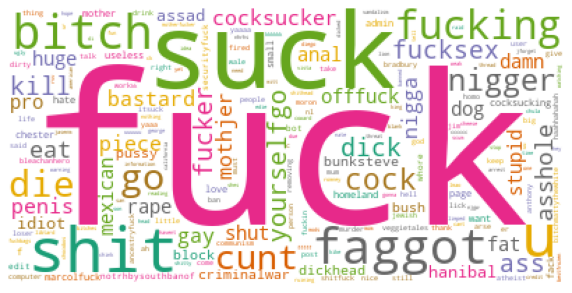

In [45]:
import matplotlib.pyplot as plt

 
highmal_cloud = wc.generate(' '.join(df["comment_text"][df['highly_malignant']==1]))
    
plt.figure(figsize =(10,6))
plt.imshow(highmal_cloud)
plt.axis('off')
plt.show()

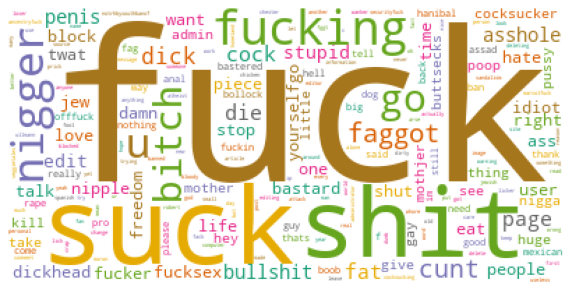

In [46]:
import matplotlib.pyplot as plt

 
rude_cloud = wc.generate(' '.join(df["comment_text"][df['rude']==1]))
    
plt.figure(figsize =(10,6))
plt.imshow(rude_cloud)
plt.axis('off')
plt.show()

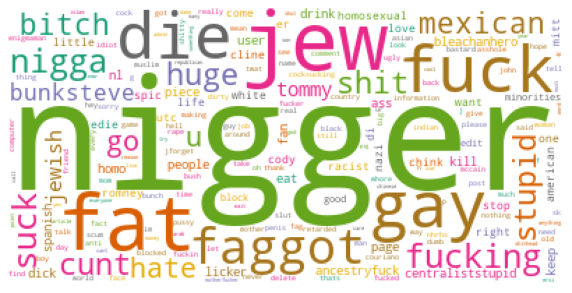

In [47]:
import matplotlib.pyplot as plt

 
loathe_cloud = wc.generate(' '.join(df["comment_text"][df['loathe']==1]))
    
plt.figure(figsize =(10,6))
plt.imshow(loathe_cloud)
plt.axis('off')
plt.show()

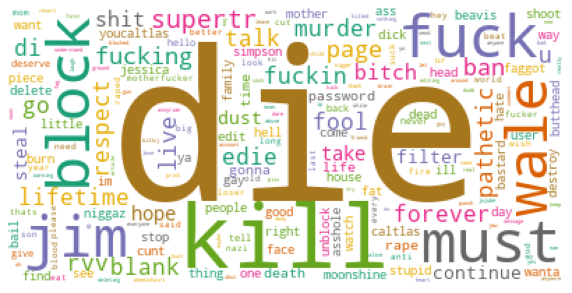

In [48]:
import matplotlib.pyplot as plt

 
threat_cloud = wc.generate(' '.join(df["comment_text"][df['threat']==1]))
    
plt.figure(figsize =(10,6))
plt.imshow(threat_cloud)
plt.axis('off')
plt.show()

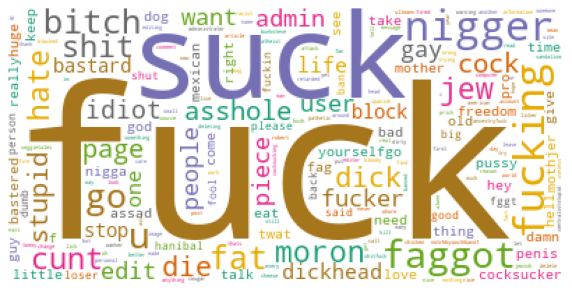

In [49]:
import matplotlib.pyplot as plt

 
abuse_cloud = wc.generate(' '.join(df["comment_text"][df['abuse']==1]))
    
plt.figure(figsize =(10,6))
plt.imshow(abuse_cloud)
plt.axis('off')
plt.show()

- Here we can view the malicious words that is used under each type of lable

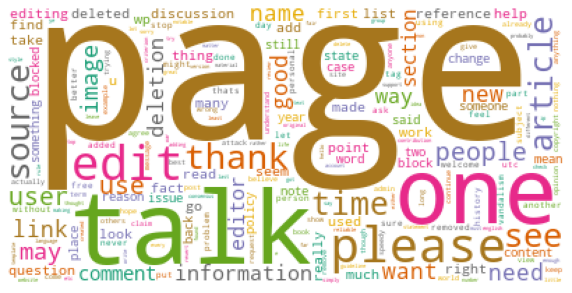

In [50]:
import matplotlib.pyplot as plt

 
rude_cloud = wc.generate(' '.join(df["comment_text"][df['rude']==0]))
    
plt.figure(figsize =(10,6))
plt.imshow(rude_cloud)
plt.axis('off')
plt.show()

- We can view the frequently used words for non offensive comments

In [51]:
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas
import nlpaug.flow as nafc

In [53]:
aug = naw.ContextualWordEmbsAug(model_path = 'bert-base-uncased', action ='insert')

In [54]:
def augument(df, aug, repititions =1, samples =200):
    augmented_texts =[]
    malig_df = df[df['Sum']==1].reset_index(drop=True)
    for i in (np.random.randint(0, len(malig_df), samples)):
        for _ in range(repititions):
            aug_text = aug.augment(malig_df['comment_text'].iloc[i])
            augmented_texts.append(aug_text)
    malig_data ={'Sum':1, 'comment_text': augmented_texts}
    aug_df = pd.DataFrame(malig_data)
    return aug_df


In [56]:
df_new = df[['comment_text', 'Sum']]

In [57]:
aug_df = augument(df_new, aug, samples =200)

In [ ]:
df = df.append(aug_df).reset_index(drop=True)


In [58]:
aug_df

,Sum,comment_text
0,1,would the geek nerd
1,1,something year old be :having as immature
2,1,extremely late everything said or reply _ing s...
3,1,hell mean no talk english wiklish kind of homo...
4,1,useless idiot defie law physic nature without ...
...,...,...
195,1,ass ripper express to read free newspaper numb...
196,1,kidding about thats talk info page advice said...
197,1,wasting time biatch back is different to ip co...
198,1,so go saddam execution talk page stink eye place


In [59]:
augg_df = augument(df_new, aug, samples =60000)

KeyboardInterrupt: 

## X and y label

In [60]:
df.loc[df.Sum > 0, 'Sum'] = 1

In [61]:
df

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,Sum
0,explanation edits made username hardcore metal...,0,0,0,0,0,0,0
1,aww match background colour seemingly stuck th...,0,0,0,0,0,0,0
2,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,0
3,real suggestion improvement wondered section s...,0,0,0,0,0,0,0
4,sir hero chance remember page thats,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,second time asking view completely contradicts...,0,0,0,0,0,0,0
159567,ashamed horrible thing put talk page,0,0,0,0,0,0,0
159568,spitzer umm there actual prostitution ring cru...,0,0,0,0,0,0,0
159569,look like actually put speedy first version de...,0,0,0,0,0,0,0


In [62]:
X = data
y = df ['Sum']

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB


In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=15)

In [65]:
nb = GaussianNB()

In [66]:
nb.fit(X_train,y_train)

GaussianNB()

In [67]:
prednb = nb.predict(X_test)
print('Accuracy',accuracy_score(y_test,prednb)*100)
print(confusion_matrix(y_test,prednb))
print(classification_report(y_test,prednb))

Accuracy 62.81685727714241
[[17308 11382]
 [  485  2740]]
              precision    recall  f1-score   support

           0       0.97      0.60      0.74     28690
           1       0.19      0.85      0.32      3225

    accuracy                           0.63     31915
   macro avg       0.58      0.73      0.53     31915
weighted avg       0.89      0.63      0.70     31915



- The model is performing poorly since we are dealing with a imbalanced dataset. This can be improved by balancing it either by augumentation or by downsampling

# Saving Model

In [68]:
import joblib

In [69]:
joblib.dump(nb,'Malignant comments')

['Malignant comments']

# Conclusion

- The project can further be improved by balancing the dataset. I have tried upsampling the malignant comments using augumentation technique, but to to the large size I was unable to complete it on time.
- We can also try downsampling which maybe a better technique
- More models can be further be used to find the best model